# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('C:/Users/miket/Documents/Unit 11 Case Study - Frequentist/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

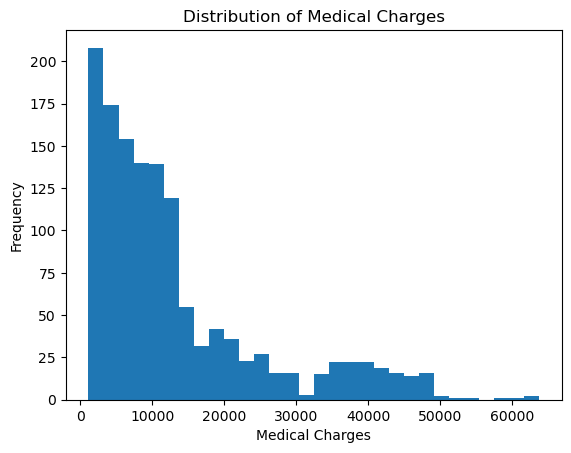

Mean of Medical Charges: 13270.42
Standard Deviation of Medical Charges: 12110.01


In [7]:
# Plotting histogram of charges
plt.hist(medical['charges'], bins=30)
plt.xlabel('Medical Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Charges')
plt.show()

# Calculating the mean of medical charges
mean_charges = medical['charges'].mean()
print(f'Mean of Medical Charges: {mean_charges:.2f}')

# Calculating the standard deviation of medical charges
std_charges = medical['charges'].std()
print(f'Standard Deviation of Medical Charges: {std_charges:.2f}')

In [ ]:
The shape of the histogram indicates that the distribution of medical charges is right-skewed, with a long tail on the right side. This suggests that while most individuals have lower medical charges, there are some individuals with significantly higher charges.
The mean of medical charges is approximately 13270.42, and the standard deviation is approximately 12110.01. The high standard deviation relative to the mean indicates a wide variability in medical charges among individuals.
Since the distribution is highly skewed, the mean may not be the best measure of central tendency. The median would provide a better representation of the typical medical charge in this case.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In [ ]:
Given that the data represents a random sample of charges from the hospital and the sample size is sufficiently large (n=1338), the Central Limit Theorem applies. The Central Limit Theorem states that the sampling distribution of the sample mean will be approximately normally distributed, regardless of the shape of the original population distribution. This allows us to make inferences about the population mean based on our sample data.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [13]:
# Extract data from charges
charges = medical['charges']
charges_count = len(charges)
charges_mean = np.mean(charges)
charges_std = np.std(charges, ddof=1)
print(f'Sample Mean of Charges: {charges_mean:.2f}')

# T-value for 95% confidence level (one-sided)
t_value_one_sided = t.ppf(0.95, df=charges_count - 1)

# Margin of error (one-sided)
margin_of_error_one_sided = t_value_one_sided * (charges_std / np.sqrt(charges_count))

# One-sided lower confidence interval
lower_bound_one_sided = charges_mean - margin_of_error_one_sided
print(f'Lower Bound of 95% Confidence Interval (One-Sided): {lower_bound_one_sided:.2f}')


Sample Mean of Charges: 13270.42
Lower Bound of 95% Confidence Interval (One-Sided): 12725.49


In [ ]:
A one-sided confidence interval is appropriate because the administrator is concerned only with whether the mean charge is less than $12000.

Since the lower bound of the one-sided 95% confidence interval is 12725.49, we can conclude that there is not enough evidence to suggest that the true mean medical charge is less than $12000 at the 95% confidence level. The data does not support the administrator's concern.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

In [ ]:
Null Hypothesis: The mean medical charge for patients with insurance is equal to the mean medical charge for patients without insurance.

Alternative Hypothesis: The mean medical charge for patients with insurance is different from the mean medical charge for patients without insurance.

We assume that the variances of the two populations are equal, which allows us to use the pooled standard deviation in our calculations.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [12]:
from scipy.stats import ttest_ind

# Extracting charges for uninsured and insured individuals
uninsured = medical[medical['insuranceclaim'] == 0]['charges']
insured = medical[medical['insuranceclaim'] == 1]['charges']

uninsured_count = len(uninsured)
insured_count = len(insured)

uninsured_mean = np.mean(uninsured)
insured_mean = np.mean(insured)

uninsured_std = np.std(uninsured, ddof=1)
insured_std = np.std(insured, ddof=1)

# Calculate the pooled standard deviation 
sp = np.sqrt(((uninsured_count - 1) * uninsured_std**2 + (insured_count - 1) * insured_std**2) / (uninsured_count + insured_count - 2))

# Calculate the t-value
t_value = (insured_mean - uninsured_mean) / (sp * np.sqrt(1/uninsured_count + 1/insured_count))
print(f'Maually Calculated t-value: {t_value:.4f}')

# Degrees of freedom
df = uninsured_count + insured_count - 2

# Calculate the p-value
p_value = 2 * t.sf(np.abs(t_value), df)
print(f'Maually Calculated p-value: {p_value:.4f}')

# Calculate the t-value and p-value using scipy
t_value_scipy, p_value_scipy = ttest_ind(insured, uninsured, equal_var=True)
print(f'Scipy Calculated t-value: {t_value_scipy:.4f}')
print(f'Scipy Calculated p-value: {p_value_scipy:.4f}')



Maually Calculated t-value: 11.8933
Maually Calculated p-value: 0.0000
Scipy Calculated t-value: 11.8933
Scipy Calculated p-value: 0.0000


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

In [ ]:
The scipy.stats module does not provide a direct function for calculating z-test like it does for t-tests. This is because the z-test is typically used when the population standard deviation is known, which is not common in practice. Instead, we often use the t-test for hypothesis testing when the sample size is small or when the population standard deviation is unknown. However, we can stil manually calculate the z-test using the formula for the z-score.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test